In [17]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import shapely.geometry
import pandas as pd
import datetime
import iris
import iris.coord_categorisation

iananmean = iris.analysis.Aggregator('nanmean', np.nanmean)

from eval_case_study_function2 import RMS_based_eval

In [52]:
case_no = '1'
field = 'speed10m'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')

In [54]:
# Case 1: 7 days
nd = 7

obs_days = np.reshape(np.array(obs), [7, 24])
downscaled_days = np.zeros_like(obs_days)

obs_mean = np.mean(obs_days, axis = 1)
# extract permitted information: daily mean

# This method requires 2 days either side, so won't work so well on shorter periods
# Linear on endpoints
# Quadratic one away from endpoints
# Cubic in the middle

downscaled_days[0, :12] = obs_mean[0]*np.ones(12)

p = np.polyfit([-12, 12, 36], obs_mean[:3], 2)

for h in np.arange(12,24):
    
    downscaled_days[0, h] = (h-24)**2*p[0] + (h-24)*p[1] + p[2]
    
for h in np.arange(24):
    
    downscaled_days[1, h] = (h)**2*p[0] + (h)*p[1] + p[2]

for i in np.arange(2,nd-2):
    
    p = np.polyfit([-36, -12, 12, 36, 60], obs_mean[i-2:i+3], 3, w = [.1, .4, 1, .4, .1])
    
    for h in np.arange(24):
    
        downscaled_days[i, h] = (h**3)*p[0] + (h**2)*p[1] + h*p[2] + p[3]
        
p = np.polyfit([-12, 12, 36], obs_mean[-3:], 2)

for h in np.arange(24):
    
    downscaled_days[-2, h] = (h)**2*p[0] + (h)*p[1] + p[2]
    
for h in np.arange(13):
    
    downscaled_days[-1, h] = (h+24)**2*p[0] + (h+24)*p[1] + p[2]
    
downscaled_days[-1, 13:] = obs_mean[-1]*np.ones(11)

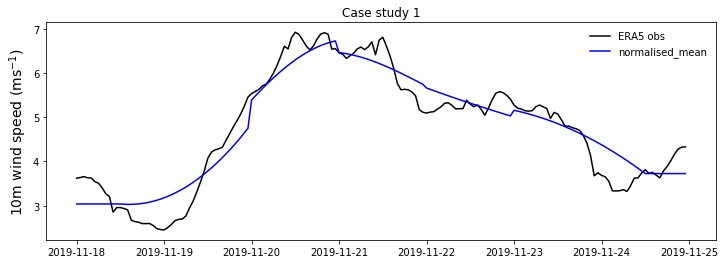

[-0.010404520228592637,
 0.3926481411796546,
 0.9087982304071697,
 array([[1.        , 0.95526457],
        [0.95526457, 1.        ]])]

In [55]:
downscale_ts = np.reshape(downscaled_days, [nd*24])
RMS_based_eval(downscale_ts,'speed10m','1','normalised_mean')

In [49]:
case_no = '2'
field = 'speed10m'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')

In [50]:
# Case 1: 9 days
nd = 9

obs_days = np.reshape(np.array(obs), [nd, 24])
downscaled_days = np.zeros_like(obs_days)

obs_mean = np.mean(obs_days, axis = 1)
# extract permitted information: daily mean

# This method requires 2 days either side, so won't work so well on shorter periods
# Linear on endpoints
# Quadratic one away from endpoints
# Cubic in the middle

downscaled_days[0, :12] = obs_mean[0]*np.ones(12)

p = np.polyfit([-12, 12, 36], obs_mean[:3], 2)

for h in np.arange(12,24):
    
    downscaled_days[0, h] = (h-24)**2*p[0] + (h-24)*p[1] + p[2]
    
for h in np.arange(24):
    
    downscaled_days[1, h] = (h)**2*p[0] + (h)*p[1] + p[2]

for i in np.arange(2,nd-2):
    
    p = np.polyfit([-36, -12, 12, 36, 60], obs_mean[i-2:i+3], 3, w = [.1, .4, 1, .4, .1])
    
    for h in np.arange(24):
    
        downscaled_days[i, h] = (h**3)*p[0] + (h**2)*p[1] + h*p[2] + p[3]
        
p = np.polyfit([-12, 12, 36], obs_mean[-3:], 2)

for h in np.arange(24):
    
    downscaled_days[-2, h] = (h)**2*p[0] + (h)*p[1] + p[2]
    
for h in np.arange(13):
    
    downscaled_days[-1, h] = (h+24)**2*p[0] + (h+24)*p[1] + p[2]
    
downscaled_days[-1, 13:] = obs_mean[-1]*np.ones(11)

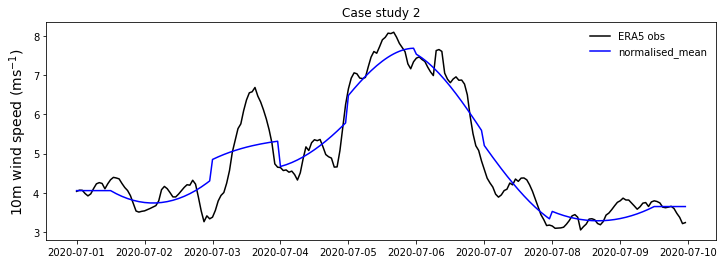

[0.017958814703895917,
 0.45970088945217413,
 0.9009551968389415,
 array([[1.        , 0.94973032],
        [0.94973032, 1.        ]])]

In [51]:
downscale_ts = np.reshape(downscaled_days, [nd*24])
RMS_based_eval(downscale_ts,'speed10m','2','normalised_mean')

In [46]:
case_no = '3'
field = 'speed10m'
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')

In [47]:
## Case 1: 28 days
nd = 28

obs_days = np.reshape(np.array(obs), [nd, 24])
downscaled_days = np.zeros_like(obs_days)

obs_mean = np.mean(obs_days, axis = 1)
# extract permitted information: daily mean

# This method requires 2 days either side, so won't work so well on shorter periods
# Linear on endpoints
# Quadratic one away from endpoints
# Cubic in the middle

downscaled_days[0, :12] = obs_mean[0]*np.ones(12)

p = np.polyfit([-12, 12, 36], obs_mean[:3], 2)

for h in np.arange(12,24):
    
    downscaled_days[0, h] = (h-24)**2*p[0] + (h-24)*p[1] + p[2]
    
for h in np.arange(24):
    
    downscaled_days[1, h] = (h)**2*p[0] + (h)*p[1] + p[2]

for i in np.arange(2,nd-2):
    
    p = np.polyfit([-36, -12, 12, 36, 60], obs_mean[i-2:i+3], 3, w = [.1, .4, 1, .4, .1])
    
    for h in np.arange(24):
    
        downscaled_days[i, h] = (h**3)*p[0] + (h**2)*p[1] + h*p[2] + p[3]
        
p = np.polyfit([-12, 12, 36], obs_mean[-3:], 2)

for h in np.arange(24):
    
    downscaled_days[-2, h] = (h)**2*p[0] + (h)*p[1] + p[2]
    
for h in np.arange(13):
    
    downscaled_days[-1, h] = (h+24)**2*p[0] + (h+24)*p[1] + p[2]
    
downscaled_days[-1, 13:] = obs_mean[-1]*np.ones(11)

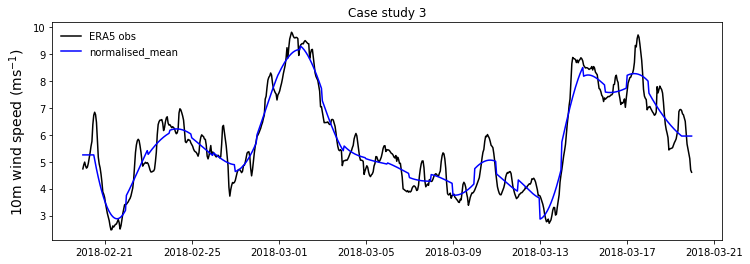

[0.01376449189419178,
 0.5181536588300991,
 0.9117696611482746,
 array([[1.        , 0.95546321],
        [0.95546321, 1.        ]])]

In [48]:
downscale_ts = np.reshape(downscaled_days, [nd*24])
RMS_based_eval(downscale_ts,'speed10m','3','normalised_mean')